# Final exam 2021
Maria Jose Medina Hernandez

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.power as smp

sns.set(rc={'figure.figsize':(12, 12)})

## Data Extraction

In [31]:
path = 'PreviousExams/data/empleados.csv'
data = pd.read_csv(path)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,...,NumCompaniesWorked,OverTime,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,RateType,Rate,Education_Field
0,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,0.0,No,Outstanding,10,2,9,0,DailyRate,1463,Bachelor//Medical
1,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,0.0,No,Outstanding,10,2,9,0,HourlyRate,64,Bachelor//Medical
2,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,0.0,No,Outstanding,10,2,9,0,MonthlyRate,14408,Bachelor//Medical
3,31,Yes,Travel_Frequently,Research_Development,15.0,Male,1,Laboratory_Technician,High,Married,...,1.0,No,Excellent,2,5,2,2,DailyRate,874,Bachelor//Medical
4,31,Yes,Travel_Frequently,Research_Development,15.0,Male,1,Laboratory_Technician,High,Married,...,1.0,No,Excellent,2,5,2,2,HourlyRate,72,Bachelor//Medical


### Exercise 1

#### Q1
**How many observations are there in the table? How many variables? Are there missing data? If the answer
to the last question is affirmative, locate these missing data indicating in which rows and columns they are found.
columns. Then, before proceeding further, delete the rows containing these data from the table.**

In [32]:
print(f"There are {len(data)} observations in the table")

There are 3528 observations in the table


In [33]:
print(f"There are {len(data.columns)} variables in the table")

There are 21 variables in the table


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3528 entries, 0 to 3527
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    3528 non-null   int64  
 1   Attrition              3528 non-null   object 
 2   BusinessTravel         3528 non-null   object 
 3   Department             3528 non-null   object 
 4   DistanceFromHome       3519 non-null   float64
 5   Gender                 3528 non-null   object 
 6   JobLevel               3528 non-null   int64  
 7   JobRole                3528 non-null   object 
 8   JobSatisfaction        3528 non-null   object 
 9   MaritalStatus          3528 non-null   object 
 10  MonthlyIncome          3528 non-null   int64  
 11  NumCompaniesWorked     3522 non-null   float64
 12  OverTime               3528 non-null   object 
 13  PerformanceRating      3528 non-null   object 
 14  TotalWorkingYears      3528 non-null   int64  
 15  Trai

There are missing data in the columns 'DistanceFromHome' and 'NumCompaniesWorked'. The rows where this occurs are the following:

In [35]:
na_rows = data[data.DistanceFromHome.isna() | data.NumCompaniesWorked.isna()].index
print(f"The rows where there is missing data are {len(na_rows)}: {na_rows}")

The rows where there is missing data are 15: Int64Index([30, 31, 32, 147, 148, 149, 897, 898, 899, 1092, 1093, 1094, 1593,
            1594, 1595],
           dtype='int64')


We delete the missing data

In [36]:
data = data.dropna()

In [38]:
data.shape

(3513, 21)

#### Q2
**Let's look at the last three columns of the table, which are:
RateType, Rate, Education_Field.**

**In particular, you will see that the Rate and RateType columns do not meet one of the conditions that define tidy datasets, because the Rate column mixes the values of more than one
tidy data sets, because the Rate column mixes the values of more than one variable.
The corresponding variable is indicated in the Rate_type column. On the other hand, Education_Field
violates another of these conditions, because each row of this table combines the values of two variables. At
this section you should clean up the dataset using the tidyverse tools. Display
the result using select so that the output of the code shows only the variables that have been modified in this
modified in this section (be careful, do not modify the data when doing this!).**

We look up the columns mentioned to see whats happening

In [49]:
data[["Rate", "RateType"]].head()

,Rate,RateType
0,1463,DailyRate
1,64,HourlyRate
2,14408,MonthlyRate
3,874,DailyRate
4,72,HourlyRate


We can see that there should be multiple columns in stead of one. We check that there are only the three values of RateType that are visible above and we create three columns accordingly

In [50]:
data.RateType.value_counts(dropna=False)

MonthlyRate    1171
DailyRate      1171
HourlyRate     1171
Name: RateType, dtype: int64

In [53]:
data["HourlyRate"] = data[data.RateType == 'HourlyRate'].Rate
data["DailyRate"] = data[data.RateType == 'DailyRate'].Rate
data["MonthlyRate"] = data[data.RateType == 'MonthlyRate'].Rate

We display the new columns

In [54]:
data[["HourlyRate", "DailyRate", "MonthlyRate"]].head()

,HourlyRate,DailyRate,MonthlyRate
0,NaN,1463.0,NaN
1,64.0,NaN,NaN
2,NaN,NaN,14408.0
3,NaN,874.0,NaN
4,72.0,NaN,NaN


In [56]:
data.Education_Field.value_counts(dropna=False)

Bachelor//Life_Sciences            558
Bachelor//Medical                  456
Master//Life_Sciences              393
College//Life_Sciences             282
Master//Medical                    258
College//Medical                   210
Below_College//Medical             162
Below_College//Life_Sciences       150
Bachelor//Marketing                141
Bachelor//Technical_Degree         138
Master//Marketing                  105
Master//Other                       87
Master//Technical_Degree            75
Bachelor//Other                     63
College//Other                      57
College//Technical_Degree           54
College//Marketing                  48
Doctor//Life_Sciences               48
Bachelor//Human_Resources           45
Below_College//Technical_Degree     42
Doctor//Medical                     36
Doctor//Marketing                   30
Below_College//Marketing            27
Master//Human_Resources             15
Below_College//Other                12
Doctor//Technical_Degree 

In [ ]:
# new data frame with split value columns
new = data["Name"].str.split(" ", n = 1, expand = True)
 
# making separate first name column from new data frame
data["First Name"]= new[0]
 
# making separate last name column from new data frame
data["Last Name"]= new[1]
 

In [94]:
ed = data["Education_Field"].str.split(pat="//", expand=True) 

In [95]:
data["EducationLevel"] = ed[0]
data["EducationField"] = ed[1]

In [102]:
data[["EducationLevel", "EducationField"]].head(10)

,EducationLevel,EducationField
0,Bachelor,Medical
1,Bachelor,Medical
2,Bachelor,Medical
3,Bachelor,Medical
4,Bachelor,Medical
5,Bachelor,Medical
6,Bachelor,Medical
7,Bachelor,Medical
8,Bachelor,Medical
9,College,Technical_Degree


#### C3
**Once the data is cleaned: what type are the variables in the data set? Make sure that all variables in this table that have been read as character are converted to factors.
This table that have been read as character are converted to factors. See the mutate_if
to do this if you need to.**

**Then make a list of quantitative variables and a list of qualitative variables (factors).
Which, within the latter, are ordered factors (it is not necessary to include the order in the transformation process).?** 

**Then make a list of quantitative variables and a list of qualitative variables (factors).**

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3513 entries, 0 to 3527
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    3513 non-null   int64  
 1   Attrition              3513 non-null   object 
 2   BusinessTravel         3513 non-null   object 
 3   Department             3513 non-null   object 
 4   DistanceFromHome       3513 non-null   float64
 5   Gender                 3513 non-null   object 
 6   JobLevel               3513 non-null   int64  
 7   JobRole                3513 non-null   object 
 8   JobSatisfaction        3513 non-null   object 
 9   MaritalStatus          3513 non-null   object 
 10  MonthlyIncome          3513 non-null   int64  
 11  NumCompaniesWorked     3513 non-null   float64
 12  OverTime               3513 non-null   object 
 13  PerformanceRating      3513 non-null   object 
 14  TotalWorkingYears      3513 non-null   int64  
 15  Trai

In [111]:
print(f"The qualitative factors are: {data.select_dtypes(include=[object]).columns}")

The qualitative factors are: Index(['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating',
       'RateType', 'Education_Field', 'EducationLevel', 'EducationField'],
      dtype='object')


Of those, ordered factors are: BusinessTravel, JobSatisfaction, PerformanceRating, RateType, EducationLevel

## Exercise 2

#### C4
**Graph the distribution of the variable age Age by means of a histogram with the density curve of the superimposed variable.
density curve of the superimposed variable.**

**Also represent a boxplot of the variable age. Optionally
you can use a violinpot or add the sample points (in this case make sure that they do not block the boxplot).**

Histogram with density curve superimposed

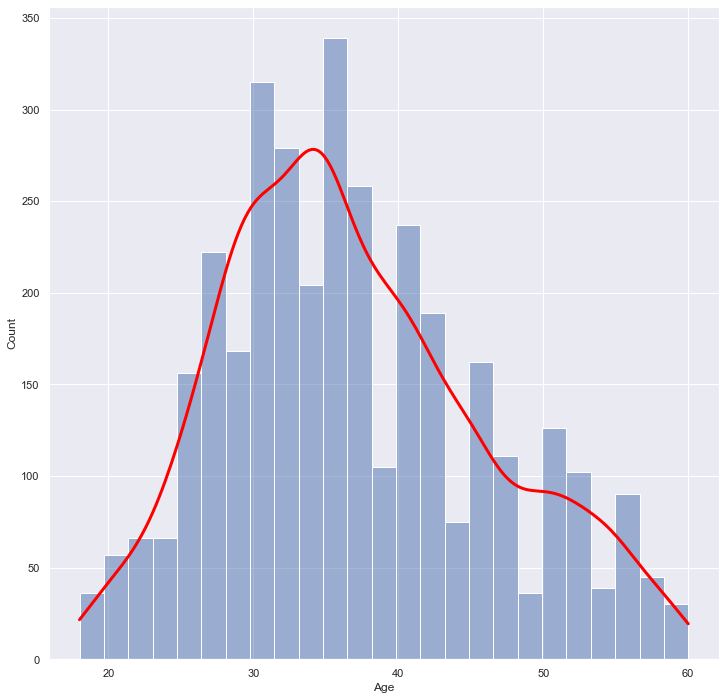

In [119]:
dens_plot = sns.histplot(data = data, x = 'Age', kde=True)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)

Boxplot

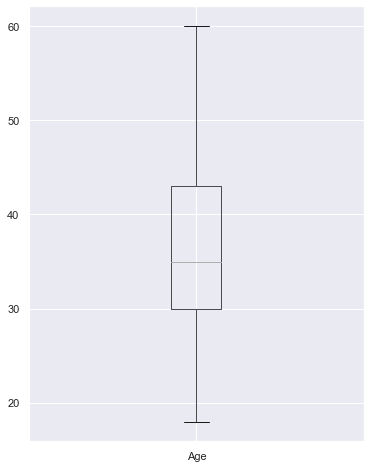

In [121]:
getPlot = data.boxplot(column='Age', figsize=(6, 8))

#### C5 
**Estudia gráficamente (por ejemplo con boxplots) la relación entre la variable Age y la variable
Attrition. ¿Influye el género en esa relación? Usa los recursos gráficos para discutir la
respuesta, lo que se busca es un juicio inicial basado en una exploración gráfica.**

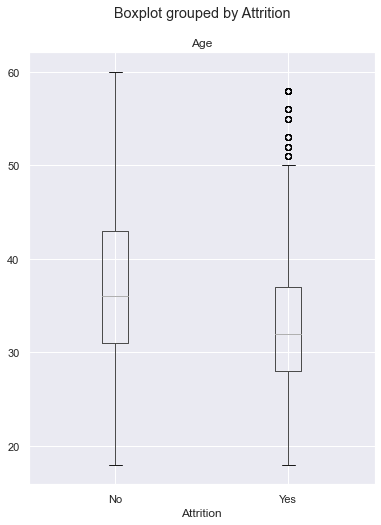

In [124]:
getPlot = data.boxplot(column='Age', by = 'Attrition', figsize=(6, 8))

Most employees that present attrition are older

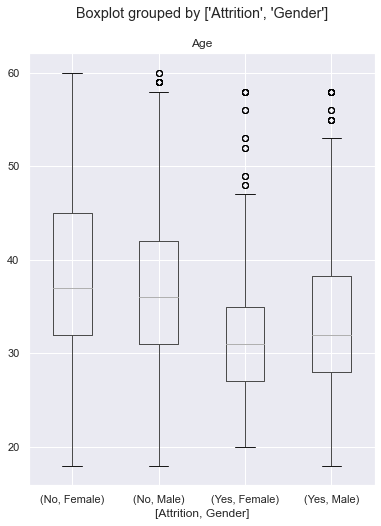

In [123]:
getPlot = data.boxplot(column='Age', by = ['Attrition', 'Gender'], figsize=(6, 8))

#### C6
**Haz la tabla de frecuencias absolutas del factor JobSatisfaction. Después haz una representación
gráfica adecuada de esa tabla. Opcionales:**

    + **Juega con los argumentos fill y position de ggplot para incorporar al gráfico la información
    de Attrition mediante colores.**
    + ** ten en cuenta que JobSatisfaction es un factor ordenado y trata de incorporar esa ordenación a
    la representación gráfica. Indicación: usa la función factor y sus argumentos levels y ordered
    para esto.**

In [137]:
data.JobSatisfaction.value_counts(dropna=False)

Very_High    1107
High         1056
Low           693
Medium        657
Name: JobSatisfaction, dtype: int64

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

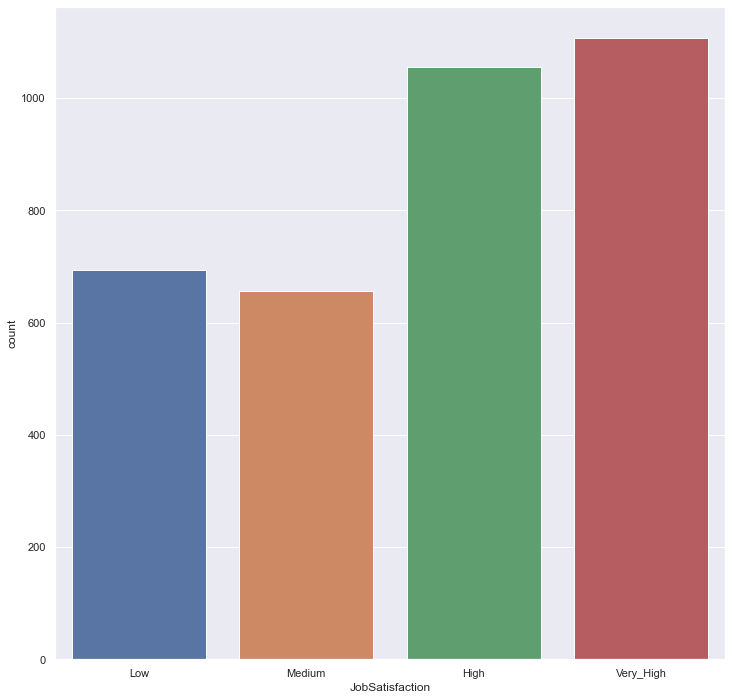

In [135]:
order = ["Low", "Medium", "High", "Very_High"]
sns.countplot(x = "JobSatisfaction", data = data, order = order)

#### C7
**Calcula la mediana del salario mensual para cada departamento y cada nivel dentro de ese departamento. Ordena la respuesta de mayor a menor y asegúrate de que en la tabla de salida se muestran
las columnas relevantes.**


#### C8
**Si elegimos al azar un empleado cuyo nivel de satisfacción en el trabajo JobSatisfaction es
VeryHigh, calcula la probabilidad de que sea soltero. Si elegimos un empleado de la empresa al azar
¿cuál es la probabilidad de que sea una mujer que lleva más de cinco años en la empresa?**


Probability that an employee with very high job satisfaction is single

In [140]:
vh_js = data[data.JobSatisfaction == 'Very_High']
vh_js.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,...,YearsAtCompany,YearsInCurrentRole,RateType,Rate,Education_Field,DailyRate,HourlyRate,MonthlyRate,EducationLevel,EducationField
0,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,9,0,DailyRate,1463,Bachelor//Medical,1463.0,NaN,NaN,Bachelor,Medical
1,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,9,0,HourlyRate,64,Bachelor//Medical,NaN,64.0,NaN,Bachelor,Medical
2,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,9,0,MonthlyRate,14408,Bachelor//Medical,NaN,NaN,14408.0,Bachelor,Medical
6,30,No,Non-Travel,Research_Development,2.0,Female,1,Laboratory_Technician,Very_High,Single,...,11,7,DailyRate,1116,Bachelor//Medical,1116.0,NaN,NaN,Bachelor,Medical
7,30,No,Non-Travel,Research_Development,2.0,Female,1,Laboratory_Technician,Very_High,Single,...,11,7,HourlyRate,49,Bachelor//Medical,NaN,49.0,NaN,Bachelor,Medical


In [144]:
p = sum(vh_js.MaritalStatus == 'Single')/len(vh_js)
print(f"The probability that an employee with very high satisfaction is single is {p}")

The probability that an employee with very high satisfaction is single is 0.35501355013550134
